In [1]:
from tensorflow_docs.vis import embed
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import DataCreation as Dc
import FeatureExtract as Fe
import ModelBuild as Mb
import numpy as np
import cv2
import os
import logging
import secrets
import imageio
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [6]:
Data = Dc.collectData('Numbers', None, None)

In [24]:
Data.frameVideo()

In [3]:
extract_data = Fe.FeatureExtraction()

In [ ]:
extract_data.extract_coordinates('Numbers', 60)

In [4]:
landmark, classes = extract_data.concatenate_data_pts('Numbers', 60)

In [5]:
print(classes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 

In [7]:
np.save(os.path.join(os.getcwd(), 'NumClasses'), classes)
np.save(os.path.join(os.getcwd(), 'NumLandmarks'), landmark)

In [8]:
X = np.load('NumLandmarks.npy')
Y = np.load('NumClasses.npy')
Y = to_categorical(Y).astype(int)

In [9]:
print(X.shape)
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.025)
print(XTrain.shape, YTrain.shape)

(1500, 60, 258)
(1462, 60, 258) (1462, 10)


In [10]:
Numbers_model = Mb.ModelBuild(X.shape[1], X.shape[2], 3, 2, 10, 100)
model = Numbers_model.fitTransform('Num', XTrain, YTrain)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None)]      0         
_________________________________________________________________
frame_position_embedding (Po (None, None, 258)         15480     
_________________________________________________________________
transformer_encode_layer (Tr (None, None, 258)         537159    
_________________________________________________________________
global_max_pooling1d (Global (None, 258)               0         
_________________________________________________________________
dropout (Dropout)            (None, 258)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2590      
Total params: 555,229
Trainable params: 555,229
Non-trainable params: 0
_______________________________________________________


Epoch 00057: val_loss did not improve from 0.29800
Epoch 58/100
31/31 [==============================] - 1s 24ms/step - loss: 0.2440 - categorical_accuracy: 0.9019 - val_loss: 0.3366 - val_categorical_accuracy: 0.8799

Epoch 00058: val_loss did not improve from 0.29800
Epoch 59/100
31/31 [==============================] - 1s 24ms/step - loss: 0.2908 - categorical_accuracy: 0.8825 - val_loss: 0.2821 - val_categorical_accuracy: 0.8903

Epoch 00059: val_loss improved from 0.29800 to 0.28215, saving model to D:\downloads\UOW\CSIT998 project\project\ASL\projectrefactoring\word_weights.hdf5
Epoch 60/100
31/31 [==============================] - 1s 23ms/step - loss: 0.4206 - categorical_accuracy: 0.8376 - val_loss: 0.2446 - val_categorical_accuracy: 0.9193

Epoch 00060: val_loss improved from 0.28215 to 0.24456, saving model to D:\downloads\UOW\CSIT998 project\project\ASL\projectrefactoring\word_weights.hdf5
Epoch 61/100
31/31 [==============================] - 1s 27ms/step - loss: 0.3030 - c

Epoch 92/100
31/31 [==============================] - 1s 24ms/step - loss: 0.1097 - categorical_accuracy: 0.9642 - val_loss: 0.2002 - val_categorical_accuracy: 0.9213

Epoch 00092: val_loss did not improve from 0.15748
Epoch 93/100
31/31 [==============================] - 1s 24ms/step - loss: 0.1797 - categorical_accuracy: 0.9316 - val_loss: 0.2494 - val_categorical_accuracy: 0.9089

Epoch 00093: val_loss did not improve from 0.15748
Epoch 94/100
31/31 [==============================] - 1s 24ms/step - loss: 0.1268 - categorical_accuracy: 0.9551 - val_loss: 0.1641 - val_categorical_accuracy: 0.9524

Epoch 00094: val_loss did not improve from 0.15748
Epoch 95/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0869 - categorical_accuracy: 0.9724 - val_loss: 0.2265 - val_categorical_accuracy: 0.9172

Epoch 00095: val_loss did not improve from 0.15748
Epoch 96/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0895 - categorical_accuracy: 0.9673 - val_loss:

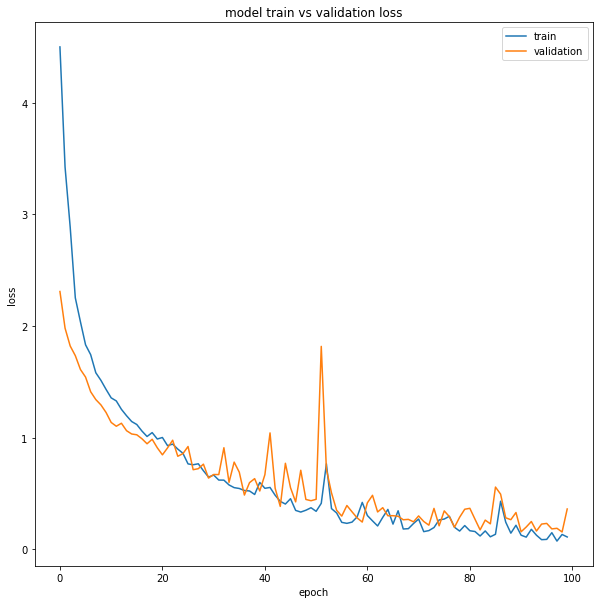

2/2 [==============================] - 0s 6ms/step - loss: 0.0441 - categorical_accuracy: 1.0000
Test accuracy: 100.0%


In [11]:
Numbers_model.stats(XTest, YTest)

In [14]:
Numbers_model = Mb.ModelBuild(X.shape[1], X.shape[2], 3, 2, 10, 100)
model = Numbers_model.constructModel()
model.load_weights(os.path.join(os.getcwd(),'word_weights.hdf5'))

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None)]      0         
_________________________________________________________________
frame_position_embedding (Po (None, None, 258)         15480     
_________________________________________________________________
transformer_encode_layer (Tr (None, None, 258)         537159    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 258)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 258)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2590      
Total params: 555,229
Trainable params: 555,229
Non-trainable params: 0
_____________________________________________________

In [15]:
res = model.predict(XTest)

In [16]:
ytrue = np.argmax(YTest, axis=1).tolist()
yhat = np.argmax(res, axis=1).tolist()
iter_folder = os.listdir(os.path.join(os.getcwd(), 'Data', 'Numbers'))
actions = np.array(os.listdir(os.path.join(os.getcwd(), 'Data', 'Numbers', iter_folder[0])))

In [17]:
print(actions)

['1' '2' '3' '4' '5' '6' '7' '8' '9' 'None']


In [18]:
cm = confusion_matrix(ytrue, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=actions)

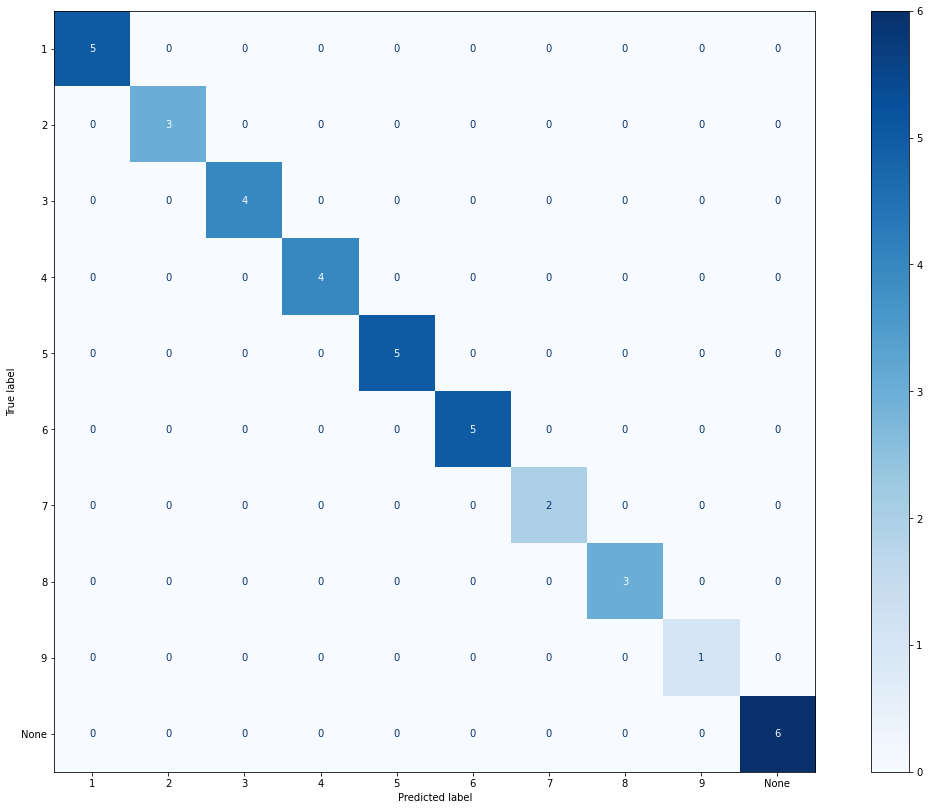

In [19]:
plt.rcParams["figure.figsize"] = (20,14)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [20]:
feature = Fe.FeatureExtraction()

In [21]:
def prepare_testVid(random_test):
    sequence =[]
    cap = cv2.VideoCapture(os.path.join(os.getcwd(),'nums_vids', random_test))
    with Fe.mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while(cap.isOpened()):
            ret, frame = cap.read()
    #         print(ret)
            if ret is True:
                image, results = feature.mp_detect(frame, holistic)
                # draw_styled_landmarks(image,results)
                keypoints = feature.get_coordinates()
                sequence.append(keypoints)
                if cv2.waitKey(1) == ord('q'):
                    break
            else:
                break
    cap.release()
    cv2.destroyAllWindows()
    sequence = sequence[-60:]
    return sequence

def to_gif(images):
    reader = imageio.get_reader(os.path.join(os.getcwd(),'nums_vids', random_test))
    images =[]
    for frames in reader:
        images.append(frames)
    imageio.mimsave("animation.gif", images, fps=15)
    return embed.embed_file("animation.gif")

def predictPercentage(random_test):
    res = model.predict(np.expand_dims(prepare_testVid(random_test), axis=0))[0]
#     print(actions[np.argsort(res)][0], ' : ', res[0], 'Actual video : ', random_test)
    counter = 0
    for i in np.argsort(res)[::-1]:
        if counter == 0:
            print(f"  {actions[i]}: {res[i] * 100:5.2f}% : {random_test}")
            counter += 1
        


In [22]:
for items in os.listdir(os.path.join(os.getcwd(), 'nums_vids')):
    predictPercentage(items)
    print("-------------------")


  1: 97.25% : test_num1-vid.avi
-------------------
  2: 98.10% : test_num2-vid.avi
-------------------
  3: 99.47% : test_num3-vid.avi
-------------------
  4: 99.38% : test_num4-vid.avi
-------------------
  5: 98.82% : test_num5-vid.avi
-------------------
  6: 98.41% : test_num6-vid.avi
-------------------
  7: 99.93% : test_num7-vid.avi
-------------------
  9: 98.08% : test_num8-vid.avi
-------------------
  9: 99.99% : test_num9-vid.avi
-------------------
